# NN cascade for URZ
### With normalization of Features as in iwt_nnet.c : iwt_normalize()

* Radek Hofman, Jan 2018

### Imports and axiliary functions and stuff

In [76]:
%load_ext sql
%matplotlib inline

The sql extension is already loaded. To reload it, use:
  %reload_ext sql


In [77]:
import os
import numpy
import scipy.io
import pandas as pd
import matplotlib.pyplot as plt

In [78]:
with open(os.path.join('/','home','hofman','.dbp.txt'), 'r') as f: password = f.read().strip()

In [79]:
query = "oracle://hofman:%s@mycelium.ctbto.org:1521/udb" % password
%sql $query

'Connected: hofman@udb'

In [80]:
% sql select count(*) from ml_features where sta='URZ'

0 rows affected.


COUNT(*)
362407


In [81]:
def plot(history):
    fig = plt.figure()
    ax = fig.add_subplot(211)
    ax.plot(history['acc'], label='acc')
    ax.plot(history['val_acc'], label='val_acc')
    ax.set_ylabel('accuracy')
    plt.legend(loc='best')
    ax = fig.add_subplot(212)
    ax.plot(history['loss'], label='loss')
    ax.plot(history['val_loss'], label='val_loss')
    plt.legend(loc='best')
    ax.set_xlabel('epoch')
    ax.set_ylabel('loss')

In [82]:
#load data from oracle do pandas
import cx_Oracle
connection = cx_Oracle.connect('hofman', password, 'udb')

### What is the misclassification rate now for all arrivals in our DB?

* #(class_iphase != class_phase) / (#automatic which are not noise) 

In [83]:
#select from database required numbers
wrong_type = %sql select count(*) from ml_features where sta='URZ' and class_phase != class_iphase
total_number = %sql select count(*) from ml_features where sta='URZ' and phase!='N' and source!='M'

0 rows affected.
0 rows affected.


In [84]:
print('Percentage of misclassified initial wave types: %3.2f%%' % (wrong_type[0][0]/total_number[0][0]*100))

Percentage of misclassified initial wave types: 47.90%


### Dataframes per class phase type

In [85]:
query = """select * from ml_features where sta='URZ' and class_phase='regS'"""
df_S_all = pd.read_sql(query, con=connection)

In [86]:
df_S_all.head()

,ARID,STA,TIME,IPHASE,CLASS_IPHASE,PHASE,CLASS_PHASE,RETIME,SOURCE,PER,...,HMXMN,HVRATP,HVRAT,NAB,TAB,HTOV1,HTOV2,HTOV3,HTOV4,HTOV5
0,25050735,URZ,1.125386e+09,Sx,regS,Sn,regS,1.000,A,0.166667,...,1.526004,0.786459,1.174982,-0.1,-0.27,1.216724,0.363039,2.166968,1.844924,0.626604
1,25058004,URZ,1.125423e+09,Lg,regS,Sn,regS,1.925,A,0.444444,...,2.762988,15.337161,15.337161,-0.1,-0.31,0.423843,1.384683,0.724611,6.547078,1.569841
2,25075768,URZ,1.125508e+09,Lg,regS,Sn,regS,1.050,A,0.333333,...,1.395858,1.296030,2.398118,0.0,0.00,0.713705,1.641215,0.940403,1.211333,1.909713
3,25092371,URZ,1.125587e+09,Sn,regS,Sn,regS,0.175,A,0.166667,...,1.746398,5.561389,2.205452,0.0,0.00,1.155050,0.646231,0.997092,1.326985,4.507104
4,25094351,URZ,1.125598e+09,Sn,regS,Sn,regS,1.400,A,0.444444,...,2.816413,5.135686,8.557762,0.0,0.00,1.682028,0.309588,2.783780,8.199625,2.007485


In [87]:
query = """select * from ml_features where sta='URZ' and class_phase='regP'"""
df_P_all = pd.read_sql(query, con=connection)

In [88]:
df_P_all.head()

,ARID,STA,TIME,IPHASE,CLASS_IPHASE,PHASE,CLASS_PHASE,RETIME,SOURCE,PER,...,HMXMN,HVRATP,HVRAT,NAB,TAB,HTOV1,HTOV2,HTOV3,HTOV4,HTOV5
0,14972252,URZ,1.069735e+09,Pn,regP,Pn,regP,2.94244,A,0.166667,...,1.542596,0.124299,0.176237,0.1,0.100,0.509125,0.983261,0.619635,0.118464,0.058735
1,14992929,URZ,1.070059e+09,Pn,regP,Pn,regP,0.00000,A,0.333333,...,1.301846,1.112025,0.258914,0.2,0.245,3.730434,0.738458,0.704325,0.247701,0.060989
2,15029724,URZ,1.070386e+09,Pn,regP,Pn,regP,0.65000,A,0.166667,...,1.828008,0.132138,0.192003,0.2,0.375,0.629496,0.632947,0.277982,0.542543,0.041916
3,15031571,URZ,1.070403e+09,Pn,regP,Pn,regP,3.22500,A,0.444444,...,1.375773,0.282216,0.589090,0.1,0.050,0.924411,0.941318,0.304547,0.520954,0.131296
4,15073977,URZ,1.070752e+09,Pg,regP,Pn,regP,0.00000,A,0.166667,...,3.529159,0.085323,0.486815,0.1,0.290,0.211185,0.225393,0.257161,0.413598,0.287086


In [89]:
query = """select * from ml_features where sta='URZ' and class_phase='tele'"""
df_T_all = pd.read_sql(query, con=connection)

In [90]:
df_T_all.head()

,ARID,STA,TIME,IPHASE,CLASS_IPHASE,PHASE,CLASS_PHASE,RETIME,SOURCE,PER,...,HMXMN,HVRATP,HVRAT,NAB,TAB,HTOV1,HTOV2,HTOV3,HTOV4,HTOV5
0,28541585,URZ,1.143123e+09,P,tele,P,tele,0.550,A,0.666667,...,1.702892,0.042081,0.042081,0.0,0.000,0.467387,0.594238,0.057473,0.053682,0.463873
1,28556291,URZ,1.143197e+09,P,tele,P,tele,0.500,A,0.333333,...,1.957241,0.223522,0.223522,0.0,0.000,0.954016,0.705002,1.308694,0.193754,0.114283
2,28557837,URZ,1.143204e+09,P,tele,P,tele,3.100,A,0.333333,...,1.190828,0.240041,0.613747,0.0,-0.195,0.577677,1.020239,0.372745,0.277075,0.067225
3,28559193,URZ,1.143210e+09,P,tele,P,tele,0.000,A,0.333333,...,1.531207,0.084376,0.084376,0.1,0.130,0.689514,0.333741,0.336678,0.119060,0.092935
4,28561877,URZ,1.143223e+09,P,tele,P,tele,0.375,A,0.444444,...,2.808070,0.038871,0.097918,0.1,0.205,0.358785,0.042658,0.127151,0.064076,0.062188


In [91]:
query = """select * from ml_features where sta='URZ' and class_phase='N'"""
df_N_all = pd.read_sql(query, con=connection)

In [92]:
df_N_all.head()

,ARID,STA,TIME,IPHASE,CLASS_IPHASE,PHASE,CLASS_PHASE,RETIME,SOURCE,PER,...,HMXMN,HVRATP,HVRAT,NAB,TAB,HTOV1,HTOV2,HTOV3,HTOV4,HTOV5
0,13097443,URZ,1.055511e+09,N,N,None,N,0.0,A,0.166667,...,2.948945,9.600216,9.600216,0.0,0.00,0.396880,1.145887,0.421142,0.406116,1.439137
1,13097727,URZ,1.055513e+09,N,N,None,N,0.0,A,0.444444,...,5.750848,9.726424,3.211865,-0.1,-0.04,0.628241,0.617270,0.890586,2.788352,1.279634
2,13097728,URZ,1.055513e+09,N,N,None,N,0.0,A,1.000000,...,1.550819,0.163623,12.531935,0.1,0.50,2.625565,0.419386,0.502452,1.093746,0.228218
3,13097729,URZ,1.055513e+09,N,N,None,N,0.0,A,0.333333,...,2.203439,0.328290,0.511023,-0.1,-0.50,0.532591,1.455946,0.672186,0.730198,0.130826
4,13097946,URZ,1.055517e+09,N,N,None,N,0.0,A,1.000000,...,2.803004,0.827978,0.630203,0.0,0.00,1.039954,0.420590,0.983108,0.450562,0.274970


In [93]:
#save to csv
#df_ora.to_csv('URZ_pandas.csv')

In [94]:
#how much data we have
print('regS', df_S_all.shape)
print('regP', df_P_all.shape)
print('tele', df_T_all.shape)
print('noise', df_N_all.shape)

regS (11135, 25)
regP (11818, 25)
tele (38083, 25)
noise (301371, 25)


# Definition of input and output

In [95]:
# columns corresponding to input
x_indices = ['PER', 'RECT', 'PLANS', 'INANG1', 'INANG3', 'HMXMN', 'HVRATP', 'HVRAT', 'NAB', 'TAB',  
             'HTOV1', 'HTOV2', 'HTOV3', 'HTOV4', 'HTOV5']
print('features count:', len(x_indices))
# columns corresponding to output
y_indices = ['CLASS_PHASE']

features count: 15


# Dataset for first phase of the cascade: N vs TPS

In [176]:
#counts of all classes
ns = df_S_all.shape[0]
np = df_P_all.shape[0]
nt = df_T_all.shape[0]
nn = df_N_all.shape[0]

#those from automatic
nsa = df_S_all[df_S_all['SOURCE'] != 'M'].shape[0]
npa = df_P_all[df_P_all['SOURCE'] != 'M'].shape[0]
nta = df_T_all[df_T_all['SOURCE'] != 'M'].shape[0]
nna = df_N_all[df_N_all['SOURCE'] != 'M'].shape[0]

#we build a balanced datased - the same portion of regS, regP and tele
#we have this count of phases
samp_count = min(nsa, npa, nta)

#sample TPS dataset, random_state is a seed
ssS = df_S_all[df_S_all['SOURCE'] != 'M'].sample(samp_count, random_state=11)
ssP = df_P_all[df_P_all['SOURCE'] != 'M'].sample(samp_count)
ssT = df_T_all[df_T_all['SOURCE'] != 'M'].sample(samp_count)
TPS_data = pd.concat([ssS, ssP, ssT])

#sample noise phases
N_data = df_N_all[df_N_all['SOURCE'] != 'M'].sample(3*samp_count)

#lets shuffle dataset
TPS_data = TPS_data.sample(frac=1).reset_index(drop=True)
N_data = N_data.sample(frac=1).reset_index(drop=True)

print(ssS.shape, ssP.shape, ssT.shape)
print(TPS_data.shape)
print(N_data.shape)

(9133, 25) (9133, 25) (9133, 25)
(27399, 25)
(27399, 25)


### Normalization of data

* normalization according to iwt_nnet.c : iwt_normalize()


In [267]:
# check on positivity of all features which are going to be log10-ed:)
# check TPS data
print('TPS')
print(TPS_data['HVRAT'][TPS_data['HVRAT']<=0])
print(TPS_data['HVRATP'][TPS_data['HVRATP']<=0])
print(TPS_data['HMXMN'][TPS_data['HMXMN']<=0])
print(TPS_data['HTOV1'][TPS_data['HTOV1']<=0])
print(TPS_data['HTOV2'][TPS_data['HTOV2']<=0])
print(TPS_data['HTOV3'][TPS_data['HTOV3']<=0])
print(TPS_data['HTOV4'][TPS_data['HTOV4']<=0])
print(TPS_data['HTOV5'][TPS_data['HTOV5']<=0])
# check NOISE data
print('NOISE')
print(N_data['HVRAT'][N_data['HVRAT']<=0])
print(N_data['HVRATP'][N_data['HVRATP']<=0])
print(N_data['HMXMN'][N_data['HMXMN']<=0])
print(N_data['HTOV1'][N_data['HTOV1']<=0])
print(N_data['HTOV2'][N_data['HTOV2']<=0])
print(N_data['HTOV3'][N_data['HTOV3']<=0])
print(N_data['HTOV4'][N_data['HTOV4']<=0])
print(N_data['HTOV5'][N_data['HTOV5']<=0])

TPS
Series([], Name: HVRAT, dtype: float64)
Series([], Name: HVRATP, dtype: float64)
Series([], Name: HMXMN, dtype: float64)
Series([], Name: HTOV1, dtype: float64)
Series([], Name: HTOV2, dtype: float64)
Series([], Name: HTOV3, dtype: float64)
Series([], Name: HTOV4, dtype: float64)
Series([], Name: HTOV5, dtype: float64)
NOISE
Series([], Name: HVRAT, dtype: float64)
Series([], Name: HVRATP, dtype: float64)
Series([], Name: HMXMN, dtype: float64)
Series([], Name: HTOV1, dtype: float64)
Series([], Name: HTOV2, dtype: float64)
Series([], Name: HTOV3, dtype: float64)
Series([], Name: HTOV4, dtype: float64)
Series([], Name: HTOV5, dtype: float64)


In [268]:
# normalize TPS
TPS_data_norm = TPS_data.copy(deep=True)
TPS_data_norm['INANG1'] /= 90.
TPS_data_norm['INANG3'] /= 90.
TPS_data_norm['HMXMN'] = numpy.log10(TPS_data['HMXMN'])
TPS_data_norm['HVRATP'] = numpy.log10(TPS_data['HVRATP'])
TPS_data_norm['HVRAT'] = numpy.log10(TPS_data['HVRAT'])
TPS_data_norm['HTOV1'] = numpy.log10(TPS_data['HTOV1'])
TPS_data_norm['HTOV2'] = numpy.log10(TPS_data['HTOV2'])
TPS_data_norm['HTOV3'] = numpy.log10(TPS_data['HTOV3'])
TPS_data_norm['HTOV4'] = numpy.log10(TPS_data['HTOV4'])
TPS_data_norm['HTOV5'] = numpy.log10(TPS_data['HTOV5'])

# normalize NOISE
N_data_norm = N_data.copy(deep=True)
N_data_norm['INANG1'] /= 90.
N_data_norm['INANG3'] /= 90.
N_data_norm['HMXMN'] = numpy.log10(N_data['HMXMN'])
N_data_norm['HVRATP'] = numpy.log10(N_data['HVRATP'])
N_data_norm['HVRAT'] = numpy.log10(N_data['HVRAT'])
N_data_norm['HTOV1'] = numpy.log10(N_data['HTOV1'])
N_data_norm['HTOV2'] = numpy.log10(N_data['HTOV2'])
N_data_norm['HTOV3'] = numpy.log10(N_data['HTOV3'])
N_data_norm['HTOV4'] = numpy.log10(N_data['HTOV4'])
N_data_norm['HTOV5'] = numpy.log10(N_data['HTOV5'])

### The same for manually added arrivals

In [269]:
import keras.utils

### Define train/test ratio

In [270]:
train_test_split_ratio = 0.75
samp_count_train = int(TPS_data_norm.shape[0] * train_test_split_ratio)
samp_count_test = TPS_data_norm.shape[0] - samp_count_train
print('train count=', samp_count_train, 'test count=', samp_count_test)

train count= 20549 test count= 6850


In [271]:
TPS_train = TPS_data_norm[:samp_count_train]
TPS_test = TPS_data_norm[samp_count_train:]

N_train = N_data_norm[:samp_count_train]
N_test = N_data_norm[samp_count_train:]

print('TPS train:',TPS_train.shape,'TPS test:',TPS_test.shape)
print('N train:  ',N_train.shape,  'N test:  ',N_test.shape)

TPS train: (20549, 25) TPS test: (6850, 25)
N train:   (20549, 25) N test:   (6850, 25)


### Check interclass balance of TPS

In [272]:
print('T in TPS train:   ', TPS_train[TPS_train['CLASS_PHASE']=='tele'].shape)
print('regP in TPS train:', TPS_train[TPS_train['CLASS_PHASE']=='regP'].shape)
print('regS in TPS train:', TPS_train[TPS_train['CLASS_PHASE']=='regS'].shape)

print('T in TPS test:    ', TPS_test[TPS_test['CLASS_PHASE']=='tele'].shape)
print('regP in TPS test: ', TPS_test[TPS_test['CLASS_PHASE']=='regP'].shape)
print('regS in TPS test: ', TPS_test[TPS_test['CLASS_PHASE']=='regS'].shape)

T in TPS train:    (6882, 25)
regP in TPS train: (6824, 25)
regS in TPS train: (6843, 25)
T in TPS test:     (2251, 25)
regP in TPS test:  (2309, 25)
regS in TPS test:  (2290, 25)


### Form train and test sets and shuffle

In [273]:
train = pd.concat([TPS_train, N_train]).sample(frac=1).reset_index(drop=True)
test =  pd.concat([TPS_test, N_test]).sample(frac=1).reset_index(drop=True)
#train.apply(pd.to_numeric, errors='ignore')
#test.apply(pd.to_numeric, errors='ignore')

### Extract features and class labels

In [274]:
train_X = train[x_indices].values.astype(float)
train_Y = train[y_indices]

test_X = test[x_indices].values.astype(float)
test_Y = test[y_indices]

train_Y_ = numpy.array(numpy.where(train_Y == 'N', 0, 1), dtype=float)
test_Y_ = numpy.array(numpy.where(test_Y == 'N', 0, 1), dtype=float)

#convert to categorical
train_Y = keras.utils.to_categorical(train_Y_)
test_Y = keras.utils.to_categorical(test_Y_)

print(train_X.shape, train_Y.shape, test_X.shape, test_Y.shape)

(41098, 15) (41098, 2) (13700, 15) (13700, 2)


#### Ground truth for all 4 classes

In [275]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
le.fit(['N', 'regS', 'regP', 'tele'])
test_Y_GT = le.transform(test[y_indices])
train_Y_GT = le.transform(train[y_indices])
test_Y_GT[:20]

/dvlscratch/SHI/users/hofman/ML/env/lib/python3.6/site-packages/sklearn/preprocessing/label.py:128: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


array([1, 2, 1, 3, 0, 0, 1, 3, 1, 2, 0, 1, 2, 0, 0, 3, 0, 0, 2, 3])

# Neural network

In [276]:
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import SGD, Adam

In [282]:
n_input = len(x_indices)
numpy.random.seed(11)

# create model
model = Sequential()
model.add(Dense(6, input_dim=n_input, activation='sigmoid'))
model.add(Dense(2, activation='sigmoid'))

sgd = SGD(lr=0.001, decay=1e-6, momentum=0.9, nesterov=True, clipnorm=1., clipvalue=0.5)
adam = Adam(lr=0.0001) #, clipnorm, clipvalue=0.5)

model.compile(
    loss = 'binary_crossentropy', 
    optimizer = 'adam',  # adam, sgd
    metrics = ['accuracy'])

In [283]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_15 (Dense)             (None, 6)                 96        
_________________________________________________________________
dense_16 (Dense)             (None, 2)                 14        
Total params: 110
Trainable params: 110
Non-trainable params: 0
_________________________________________________________________


In [284]:
hist_keys = ('acc', 'val_acc', 'loss', 'val_loss')

In [285]:
history = {k : [] for k in hist_keys}

In [ ]:
h = model.fit(train_X[:], train_Y[:], 
          epochs=300, 
          #batch_size=32, 
          verbose=1,
          shuffle=True,
          #validation_split=0.1)
          validation_data=(test_X, test_Y))

history = {k : history[k] + h.history[k] for k in hist_keys}

In [290]:
train_Y[train_Y==0].shape, train_Y[train_Y==1].shape
test_Y[test_Y==0].shape, test_Y[test_Y==1].shape

((13700,), (13700,))

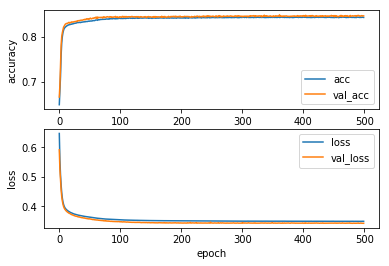

In [291]:
plot(history)

In [292]:
# calculate predicted values
Y_pred_ = model.predict(test_X)
# predictions are outputted as floats from [0,1]
print(Y_pred_[:10])

[[0.00186699 0.998133  ]
 [0.19574276 0.8042573 ]
 [0.02698456 0.9730154 ]
 [0.23807387 0.7619261 ]
 [0.59623444 0.4037656 ]
 [0.92239445 0.07760559]
 [0.00392754 0.9960725 ]
 [0.12637027 0.8736298 ]
 [0.43665296 0.5633469 ]
 [0.26595148 0.7340485 ]]


In [293]:
Y_pred = numpy.argmax(Y_pred_, axis=1)

In [294]:
from sklearn.metrics import confusion_matrix

# we must translate it to 0, 1 based on thresholding at 0.5
# where < 0.5 set to 0, to 1 otherwise
Y_pred = numpy.where(Y_pred < 0.5, 0, 1)

# calculate confusion matrix
conf_mat = confusion_matrix(test_Y_, Y_pred)
print(conf_mat)

[[5828 1022]
 [1089 5761]]


In [295]:
## confusion matrix on Train?
Y_pred = numpy.where(numpy.argmax(model.predict(train_X), axis=1) < 0.5, 0, 1)
conf_mat = confusion_matrix(train_Y_, Y_pred)
print(conf_mat)

[[17286  3263]
 [ 3187 17362]]


In [296]:
#eval on test data
model.evaluate(test_X, test_Y)

13700/13700 [==============================] - 0s 6us/step


[0.34290640844045767, 0.8459124087591241]

In [297]:
model.evaluate(train_X, train_Y)

41098/41098 [==============================] - 0s 7us/step


[0.3489173969272117, 0.8430580563502066]

In [298]:
#save model and weights
model.save('URZ_model_15-6-2_norm_NTPS.h5')

# Neural network TP vs S 

* we need a new dataset for this

## Dataset for TP vs S

In [299]:
print(TPS_train.shape, TPS_test.shape)

(20549, 25) (6850, 25)


In [300]:
train_X_TPS = TPS_train[x_indices].values.astype(float)
train_Y_TPS = TPS_train[y_indices]

test_X_TPS = TPS_test[x_indices].values.astype(float)
test_Y_TPS = TPS_test[y_indices]

#regS = 0, T/regP = 1
train_Y_TPS_ = numpy.array(numpy.where(train_Y_TPS['CLASS_PHASE'] == 'regS', 0, 1), dtype=float)
test_Y_TPS_ = numpy.array(numpy.where(test_Y_TPS['CLASS_PHASE'] == 'regS', 0, 1), dtype=float)

#convert to categorical
train_Y_TPS = keras.utils.to_categorical(train_Y_TPS_)
test_Y_TPS = keras.utils.to_categorical(test_Y_TPS_)

print(train_X_TPS.shape, train_Y_TPS.shape, test_X_TPS.shape, test_Y_TPS.shape)

(20549, 15) (20549, 2) (6850, 15) (6850, 2)


### Manually added datasets for testing

In [301]:
#those manually added
nsm = df_S_all[df_S_all['SOURCE'] == 'M'].shape[0]
npm = df_P_all[df_P_all['SOURCE'] == 'M'].shape[0]
ntm = df_T_all[df_T_all['SOURCE'] == 'M'].shape[0]
nnm = df_N_all[df_N_all['SOURCE'] == 'M'].shape[0]

#we build a balanced datased - the same portion of regS, regP and tele
#we have this count of phases
man_samp_count = min(nsm, npm, ntm)

#sample TPS dataset, random_state is a seed
mssS = df_S_all[df_S_all['SOURCE'] == 'M'].sample(man_samp_count, random_state=11)
mssP = df_P_all[df_P_all['SOURCE'] == 'M'].sample(man_samp_count)
mssT = df_T_all[df_T_all['SOURCE'] == 'M'].sample(man_samp_count)
MTPS_data = pd.concat([mssS, mssP, mssT])


#normalize

MTPS_data_norm = MTPS_data.copy(deep=True)
MTPS_data_norm['INANG1'] /= 90.
MTPS_data_norm['INANG3'] /= 90.
MTPS_data_norm['HMXMN'] = numpy.log10(MTPS_data['HMXMN'])
MTPS_data_norm['HVRATP'] = numpy.log10(MTPS_data['HVRATP'])
MTPS_data_norm['HVRAT'] = numpy.log10(MTPS_data['HVRAT'])
MTPS_data_norm['HTOV1'] = numpy.log10(MTPS_data['HTOV1'])
MTPS_data_norm['HTOV2'] = numpy.log10(MTPS_data['HTOV2'])
MTPS_data_norm['HTOV3'] = numpy.log10(MTPS_data['HTOV3'])
MTPS_data_norm['HTOV4'] = numpy.log10(MTPS_data['HTOV4'])
MTPS_data_norm['HTOV5'] = numpy.log10(MTPS_data['HTOV5'])

#manually added noise makes nos sense - we do not sanmple N

#lets shuffle dataset
MTPS_data_norm = MTPS_data_norm.sample(frac=1).reset_index(drop=True)

manual_X = MTPS_data_norm[x_indices].values.astype(float)
#regS = 0, T/regP = 1
manual_Y_TPS_ = numpy.array(numpy.where(MTPS_data_norm[y_indices] == 'regS', 0, 1), dtype=float)
manual_Y_TPS = keras.utils.to_categorical(manual_Y_TPS_)

print(manual_X.shape, manual_Y_TPS.shape, manual_Y_TPS_.shape)

(6006, 15) (6006, 2) (6006, 1)


#### Manual dataset ground truth

In [302]:
manual_Y_GT = le.transform(MTPS_data_norm[y_indices])
manual_Y_GT[:10]

/dvlscratch/SHI/users/hofman/ML/env/lib/python3.6/site-packages/sklearn/preprocessing/label.py:128: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


array([2, 3, 1, 2, 3, 3, 2, 2, 1, 3])

### Neural network

In [303]:
history_TPS = {k : [] for k in hist_keys}

In [304]:
n_input = len(x_indices)
numpy.random.seed(11)

# create model
model_TPS = Sequential()
model_TPS.add(Dense(6, input_dim=n_input, activation='sigmoid'))
model_TPS.add(Dense(2, activation='sigmoid'))

model_TPS.compile(
    loss = 'binary_crossentropy', 
    optimizer = 'adam',  # adam, sgd
    metrics = ['accuracy'])

In [305]:
model_TPS.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_17 (Dense)             (None, 6)                 96        
_________________________________________________________________
dense_18 (Dense)             (None, 2)                 14        
Total params: 110
Trainable params: 110
Non-trainable params: 0
_________________________________________________________________


In [ ]:
h = model_TPS.fit(train_X_TPS[:], train_Y_TPS[:], 
          epochs=500, 
          #batch_size=32, 
          verbose=1,
          shuffle=True,
          #validation_split=0.1)
          validation_data=([test_X_TPS, test_Y_TPS]))

history_TPS = {k : history_TPS[k] + h.history[k] for k in hist_keys}

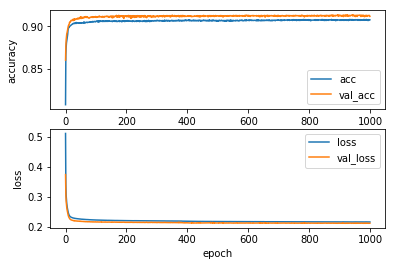

In [308]:
plot(history_TPS)

In [309]:
model.save('URZ_model_15-6-2_norm_TPS.h5')

In [310]:
model_TPS.evaluate(test_X_TPS, test_Y_TPS)

6850/6850 [==============================] - 0s 8us/step


[0.21132250684891304, 0.9118248175182482]

#### Test data confusion matrix

In [311]:
Y_pred = numpy.reshape(numpy.argmax(model_TPS.predict(test_X_TPS), axis=1), (test_X_TPS.shape[0],1))

# calculate confusion matrix
C = confusion_matrix(test_Y_TPS_, Y_pred)
print(C)

[[2204   86]
 [ 518 4042]]


In [312]:
diagsum = numpy.diag(C).sum()
accuracy = diagsum/C.sum()
print('Accuracy: %3.2f%%' % (accuracy*100))

Accuracy: 91.18%


#### Just for curiosity -  Manual associations confusion matrix

In [313]:
Y_pred_man = numpy.argmax(model_TPS.predict(manual_X), axis=1)

# calculate confusion matrix
C = confusion_matrix(manual_Y_TPS_, Y_pred_man)
print(C)
diagsum = numpy.diag(C).sum()
accuracy = diagsum/C.sum()
print('Accuracy: %3.2f%%' % (accuracy*100))

[[1854  148]
 [1067 2937]]
Accuracy: 79.77%


# Neural network T vs regP 

* we need a new dataset for this

### Dataset for T vs regP

In [314]:
#exclude regS
TP_train = TPS_train[TPS_train['CLASS_PHASE'] != 'regS']
TP_test  = TPS_test [TPS_test ['CLASS_PHASE'] != 'regS']

In [315]:
train_X_TP = TP_train[x_indices].values.astype(float)
train_Y_TP = TP_train[y_indices]

test_X_TP = TP_test[x_indices].values.astype(float)
test_Y_TP = TP_test[y_indices]

#regS = 0, T/regP = 1
train_Y_TP_ = numpy.array(numpy.where(train_Y_TP['CLASS_PHASE'] == 'regP', 0, 1), dtype=float)
test_Y_TP_ = numpy.array(numpy.where(test_Y_TP['CLASS_PHASE'] == 'regP', 0, 1), dtype=float)

#convert to categorical
train_Y_TP = keras.utils.to_categorical(train_Y_TP_)
test_Y_TP = keras.utils.to_categorical(test_Y_TP_)

print(train_X_TP.shape, train_Y_TP.shape, test_X_TP.shape, test_Y_TP.shape)

(13706, 15) (13706, 2) (4560, 15) (4560, 2)


### Neural network

In [316]:
history_TP = {k : [] for k in hist_keys}

In [317]:
n_input = len(x_indices)
numpy.random.seed(11)

# create model
model_TP = Sequential()
model_TP.add(Dense(6, input_dim=n_input, activation='sigmoid'))
model_TP.add(Dense(2, activation='sigmoid'))

model_TP.compile(
    loss = 'binary_crossentropy', 
    optimizer = 'adam',  # adam, sgd
    metrics = ['accuracy'])

In [ ]:
h = model_TP.fit(train_X_TP[:], train_Y_TP[:], 
          epochs=1000, 
          #batch_size=32, 
          verbose=1,
          shuffle=True,
          #validation_split=0.1)
          validation_data=([test_X_TP, test_Y_TP]))

history_TP = {k : history_TP[k] + h.history[k] for k in hist_keys}

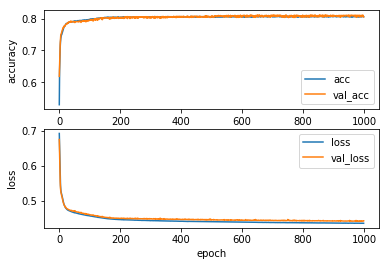

In [319]:
plot(history_TP)

In [320]:
model.save('URZ_model_15-6-2_norm_TP.h5')

In [321]:
model_TP.evaluate(test_X_TP, test_Y_TP)

4560/4560 [==============================] - 0s 7us/step


[0.4433557962116442, 0.8052631578947368]

#### Test data confusion matrix

In [322]:
Y_pred = numpy.reshape(numpy.argmax(model_TP.predict(test_X_TP), axis=1), (test_X_TP.shape[0],1))

# calculate confusion matrix
conf_mat = confusion_matrix(test_Y_TP_, Y_pred)
print(conf_mat)

[[1855  454]
 [ 434 1817]]


# Cascade of all three models

In [323]:
from keras.models import load_model

In [324]:
model_NTPS = load_model('URZ_model_15-6-2_norm_NTPS.h5')
model_STP = load_model('URZ_model_15-6-2_norm_TPS.h5')
model_PT = load_model('URZ_model_15-6-2_norm_TP.h5')

In [325]:
def predict_iwt(X, stage=0):
    """
    predicts initial wave type for given featrue vectors
    Class encoding generated by sklearn Label Encoder
    0 - noise
    2 - regS 
    1 - regP
    3 - T
    """
    Y = numpy.arange(X.shape[0])
    
    N_indices = None
    S_indices = None 
    
    if stage >= 1:
        N_indices = [False] * X.shape[0]
        X_PTS = X
        Y_NPTS = numpy.ones(X.shape[0])
    if stage >= 2:
        S_indices =  [False] * X.shape[0]  # numpy.array([])
        X_PT = X
        Y_PTS = numpy.ones(X.shape[0])
        
    
    """
    N vs regS, regP, T
    """
    if N_indices is None:
        #predict N vs T,regP,regS
        Y_NPTS = numpy.argmax(model_NTPS.predict(X), axis=1)
        #set which are noise
        N_indices = Y[Y_NPTS == 0]  #  = 0
        #get candidates for TPS
        X_PTS = X[Y_NPTS > 0]
    else:
        print('Skipping N, classifying TPS only')

    """
    regS vs regP, T
    """
    if S_indices is None:    
        #predict regS vs T,regP
        Y_PTS = numpy.argmax(model_TPS.predict(X_PTS), axis=1)
        #set which are regS
        S_indices = Y[Y_NPTS > 0][Y_PTS == 0]  # = 2
        #get candidates for regP,T
        X_PT = X_PTS[Y_PTS > 0]
    else:
        print('Skipping N, regS, classifying TP only')

    """
    regP vs T
    """
    #predict regP vs T
    Y_PT = numpy.argmax(model_TP.predict(X_PT), axis=1)
    #set which are regP
    P_indices = Y[Y_NPTS > 0][Y_PTS > 0][Y_PT == 0]  # = 1    
    #set which are T
    T_indices = Y[Y_NPTS > 0][Y_PTS > 0][Y_PT > 0]   # = 3
    #get those which are T
    X_T = X_PT[Y_PT > 0]
    
    Y[N_indices] = 0 # N
    Y[S_indices] = 2 # regS
    Y[P_indices] = 1 # regP 
    Y[T_indices] = 3 # tele
    
    return Y
    

In [326]:
Y = predict_iwt(test_X)

### Overall confusion matrix for test data

In [327]:
test_X.shape, Y.shape, test_Y_GT.shape

((13700, 15), (13700,), (13700,))

In [328]:
C = confusion_matrix(Y, test_Y_GT)
print(C)

[[5828  254  583  252]
 [ 298 1666    6  390]
 [ 574    7 1657  423]
 [ 150  382   44 1186]]


In [329]:
diagsum = numpy.diag(C).sum()
accuracy = diagsum/C.sum()
print('Accuracy: %3.2f%%' % (accuracy*100))

Accuracy: 75.45%


### Test data just regS, regP, T - not to be confused with overall statistics on all arrivals in our DB

In [330]:
test_TPS = test[test['CLASS_PHASE'] != 'N']
test_TPS_X = test_TPS[x_indices]
test_TPS_pred_Y = predict_iwt(test_TPS_X)
test_TPS_truth_Y = le.transform(test_TPS['CLASS_PHASE'])
test_TPS_iphase_Y = le.transform(test_TPS['CLASS_IPHASE'])

In [331]:
test_TPS_iphase_Y.min(), test_TPS_iphase_Y.max()

(0, 3)

In [332]:
print('IPHASE:')
C = confusion_matrix(test_TPS_iphase_Y, test_TPS_truth_Y)
print(C)
diagsum = numpy.diag(C).sum()
accuracy = diagsum/C.sum()
print('Accuracy: %3.2f%%' % (accuracy*100))

IPHASE:
[[   0  335  831  335]
 [   0 1694  139  518]
 [   0   47 1283  355]
 [   0  233   37 1043]]
Accuracy: 58.69%


In [336]:
print('NEW PREDICTION')
C = confusion_matrix(test_TPS_pred_Y, test_TPS_truth_Y)
print(C)
diagsum = numpy.diag(C).sum()
accuracy = diagsum/C.sum()
print('Accuracy: %3.2f%%' % (accuracy*100))

NEW PREDICTION
[[   0  254  583  252]
 [   0 1666    6  390]
 [   0    7 1657  423]
 [   0  382   44 1186]]
Accuracy: 65.82%


* in the test data, the current iwt characterized 1501 as NOISE (first row of confusion matrix)
* our new iwt would characterize 1089 as NOISE
* after re-training, accuracy on the test set rose from 58.68% to 65.82% for regS, regP and T phases

#### ..on train data just to see if it works

In [337]:
Y = predict_iwt(train_X)
C = confusion_matrix(Y, train_Y_GT)
print(C)
diagsum = numpy.diag(C).sum()
accuracy = diagsum/C.sum()
print('Accuracy: %3.2f%%' % (accuracy*100))

[[17286   685  1639   863]
 [  906  5017    26  1186]
 [ 1848    27  5050  1291]
 [  509  1095   128  3542]]
Accuracy: 75.17%


### Overall confusion matrix for all manual associations (no Noise)

In [338]:
C = confusion_matrix(predict_iwt(manual_X, stage=1), manual_Y_GT)
print(C)

Skipping N, classifying TPS only
[[1231   62  365]
 [ 268 1854  799]
 [ 503   86  838]]


In [339]:
diagsum = numpy.diag(C).sum()
accuracy = diagsum/C.sum()
print('Accuracy: %3.2f%%' % (accuracy*100))

Accuracy: 65.32%


## Let's try all noise samples we have

In [349]:
# let's get all noise phases not used for training
N_data_diff = pd.concat([df_N_all, N_data]).loc[
    df_N_all.index.symmetric_difference(N_data.index)
]

In [352]:
print(N_data_diff.shape, df_N_all.shape, N_data.shape)
print(N_data_diff.shape[0], 'should equal', df_N_all.shape[0]-N_data.shape[0])

(273972, 25) (301371, 25) (27399, 25)
273972 should equal 273972


In [353]:
N_data_norm = N_data_diff[x_indices].copy(deep=True)
N_data_norm['INANG1'] /= 90.
N_data_norm['INANG3'] /= 90.
N_data_norm['HMXMN'] = numpy.log10(df_N_all['HMXMN'])
N_data_norm['HVRATP'] = numpy.log10(df_N_all['HVRATP'])
N_data_norm['HVRAT'] = numpy.log10(df_N_all['HVRAT'])
N_data_norm['HTOV1'] = numpy.log10(df_N_all['HTOV1'])
N_data_norm['HTOV2'] = numpy.log10(df_N_all['HTOV2'])
N_data_norm['HTOV3'] = numpy.log10(df_N_all['HTOV3'])
N_data_norm['HTOV4'] = numpy.log10(df_N_all['HTOV4'])
N_data_norm['HTOV5'] = numpy.log10(df_N_all['HTOV5'])

In [354]:
N_data_norm.shape

(273972, 15)

In [355]:
N_X = N_data_norm[x_indices].values.astype(float)
N_Y = numpy.zeros(N_X.shape[0])

print(N_X.shape, N_Y.shape)

(273972, 15) (273972,)


In [356]:
Y = predict_iwt(N_X)
C = confusion_matrix(Y, N_Y)
print(C)
diagsum = numpy.diag(C).sum()
accuracy = diagsum/C.sum()
print('Accuracy: %3.2f%%' % (accuracy*100))

[[229585      0      0      0]
 [ 13107      0      0      0]
 [ 24333      0      0      0]
 [  6947      0      0      0]]
Accuracy: 83.80%


* From all avaibale noise phases which were not used for training we are able to correctly identify 83.8%